#### Import Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import datetime
from datetime import date, timedelta
today= date.today() #this helps to get todays data.
import yfinance as yf #This will help you collect the latest data each time you run this code:


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Data Pre-Processing

In [ ]:
d1 = today.strftime("%Y-%m-%d") #"%Y-%m-%d" this is a format of year-month-day
                                # to format this datetime object into a string

In [ ]:
end_date = d1

In [ ]:
d2 = date.today() - timedelta(days=730) #A timedelta object displays the amount of time—in days, seconds, and microseconds

In [ ]:
d2 = d2.strftime("%Y-%m-%d")

In [ ]:
start_date = d2

In [ ]:
data=yf.download('TATAMOTORS.NS', start=start_date, end=end_date, progress=False) #

In [ ]:
data['Date']= data.index

In [ ]:
data=data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-23,481.750000,485.399994,475.299988,477.000000,475.517944,17703998
1,2022-02-24,455.950012,461.549988,405.450012,427.950012,426.620361,57265685
2,2022-02-25,444.850006,465.700012,441.600006,459.750000,458.321564,48876182
3,2022-02-28,445.000000,457.350006,440.450012,454.049988,452.639252,34475468
4,2022-03-02,452.950012,454.250000,444.549988,447.600006,446.209320,25791134


In [ ]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
484,2024-02-09,926.000000,927.400024,906.049988,915.000000,915.000000,7904881
485,2024-02-12,916.099976,925.000000,908.000000,911.599976,911.599976,7286778
486,2024-02-13,911.599976,919.099976,894.000000,906.900024,906.900024,8574218
487,2024-02-14,900.000000,919.950012,894.349976,918.299988,918.299988,6570939
488,2024-02-15,923.700012,927.000000,916.349976,920.549988,920.549988,6430799
489,2024-02-16,925.000000,948.799988,924.099976,938.599976,938.599976,12826164
490,2024-02-19,942.950012,942.950012,931.049988,932.599976,932.599976,4632214
491,2024-02-20,934.450012,934.650024,920.400024,926.349976,926.349976,4733639
492,2024-02-21,926.349976,937.200012,916.500000,921.049988,921.049988,6011018
493,2024-02-22,924.650024,933.849976,914.599976,932.299988,932.299988,6437014


In [ ]:
data.rename(columns={'Close': 'share_price'}, inplace=True)

In [ ]:
data = data[['Date','share_price']]

In [ ]:
data.head()

,Date,share_price
0,2022-02-23,477.000000
1,2022-02-24,427.950012
2,2022-02-25,459.750000
3,2022-02-28,454.049988
4,2022-03-02,447.600006


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         494 non-null    datetime64[ns]
 1   share_price  494 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


#### No null values

In [ ]:
data.isnull().sum()

Date           0
share_price    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.duplicated(['Date']).sum()

0

In [ ]:
print(data['Date'].nunique())

494


In [ ]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()

#### EDA

In [ ]:
# Primary Analysis

data2['Year'] = data2['Date'].dt.year
data2['Qtr'] = data2['Date'].dt.quarter
data2['Month'] = data2['Date'].dt.month
data2.head()

,Date,share_price,Year,Qtr,Month
0,2022-02-23,477.000000,2022,1,2
1,2022-02-24,427.950012,2022,1,2
2,2022-02-25,459.750000,2022,1,2
3,2022-02-28,454.049988,2022,1,2
4,2022-03-02,447.600006,2022,1,3


In [ ]:
# How data is varying month and date-wise
# Month wise analysizing share prices in each year

pt1 = pd.pivot_table(data=data2, columns=['Year'],index=['Month'],values=['share_price'])
pt1

share_price                        
Year         2022        2023        2024
Month                                    
1             NaN  410.430950  812.347618
2      454.687500  437.642502  919.059364
3      424.790478  420.271429         NaN
4      440.799994  464.676471         NaN
5      414.921426  510.681820         NaN
6      415.188639  565.752383         NaN
7      436.885713  620.730954         NaN
8      470.670000  614.184093         NaN
9      434.636365  622.687503         NaN
10     402.365789  639.719995         NaN
11     427.169047  666.975000         NaN
12     409.861364  724.022504         NaN

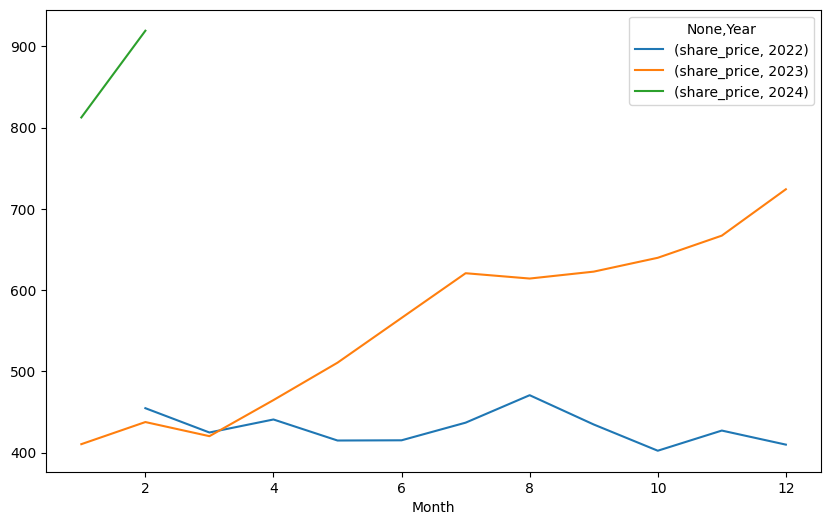

In [ ]:
pt1.plot(figsize=(10,6))
plt.show()

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data.head()

,share_price
Date,
2022-02-23,477.000000
2022-02-24,427.950012
2022-02-25,459.750000
2022-02-28,454.049988
2022-03-02,447.600006


#### Original Data

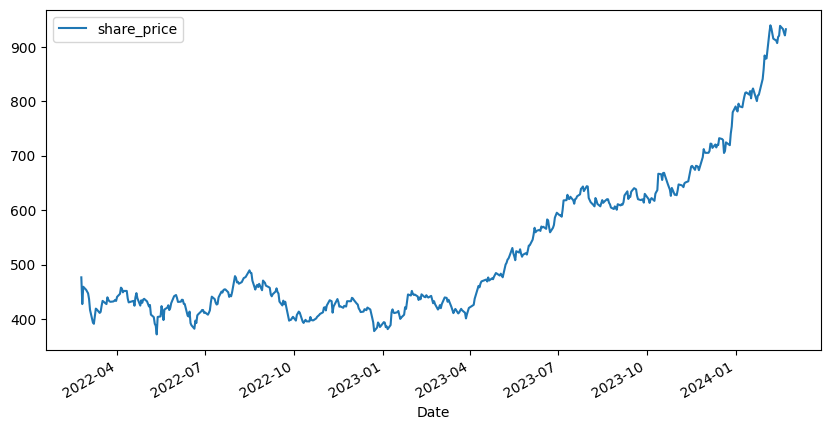

In [ ]:
data.plot(figsize=(10,5))
plt.show()

#### To check if data is stationary or not

In [ ]:
# Augmented Dickey - Fuller Test

def adf_test(data):
    res = adfuller(data)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [ ]:
adf_test(data)

ADF-Test_Stat 2.152766535532003
p-val 0.9988413373180293
Ho accepted - Data is non-stationary


#### To make the data stationary

In [ ]:
data['share_price_diff'] = data['share_price'].diff()
data= data.dropna()

In [ ]:
data.head()

,share_price,share_price_diff
Date,,
2022-02-24,427.950012,-49.049988
2022-02-25,459.750000,31.799988
2022-02-28,454.049988,-5.700012
2022-03-02,447.600006,-6.449982
2022-03-03,437.100006,-10.500000


In [ ]:
adf_test(data['share_price_diff'].dropna())

ADF-Test_Stat -22.259809559762978
p-val 0.0
H1 accepted - Data is stationary


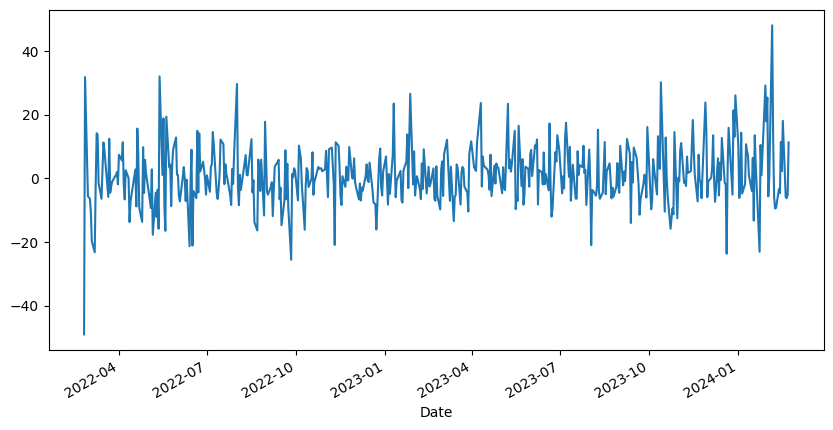

In [ ]:
# data when stationary

data['share_price_diff'].plot(figsize=(10,5))
plt.show()

#### Time Series Data Decomposition

In [ ]:
import statsmodels.api as sm

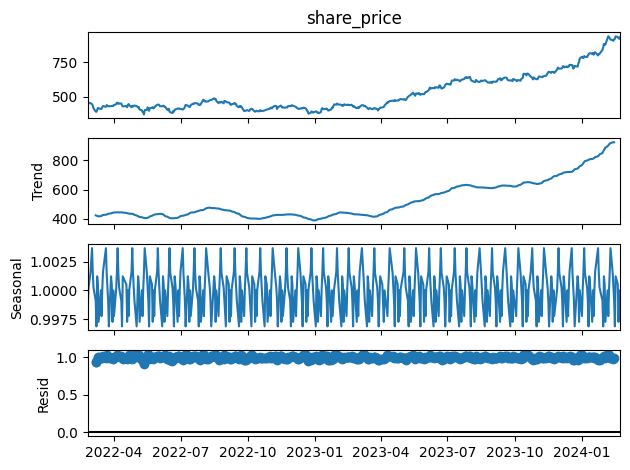

In [ ]:
# for original data (not stationary)

decomposition = sm.tsa.seasonal_decompose(data['share_price'], model='multiplicative',period = 12)
fig = decomposition.plot()
plt.show()

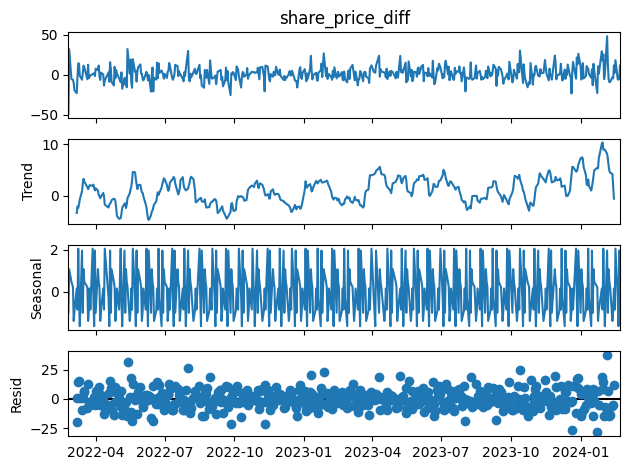

In [ ]:
# data is stationary
# Multiplicative seasonality is not appropriate for 0 and negative values

decomposition = sm.tsa.seasonal_decompose(data['share_price_diff'], model='additive',period = 12) #additive if data i negative we use additive.
fig = decomposition.plot()
plt.show()

#### Splitting the data into train and test

In [ ]:
# Split the data into training and testing sets
train_data, test_data = data[[ "share_price_diff"]].iloc[:int(0.8 * len(data))], data[[ "share_price_diff"]].iloc[int(0.8 * len(data)):]

In [ ]:
train_data.head()

,share_price_diff
Date,
2022-02-24,-49.049988
2022-02-25,31.799988
2022-02-28,-5.700012
2022-03-02,-6.449982
2022-03-03,-10.500000


In [ ]:
test_data.head()

,share_price_diff
Date,
2023-09-28,-6.050049
2023-09-29,16.100037
2023-10-03,-9.750000
2023-10-04,-6.850037
2023-10-05,6.000000


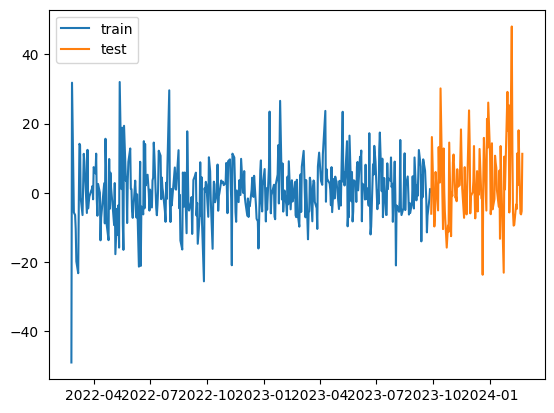

In [ ]:
plt.plot(train_data,label='train')
plt.plot(test_data,label='test')
plt.legend()
plt.show()


let’s have a look at the correlation of all the columns in the data concerning the Close column

In [ ]:
correlation = data.corr()

In [ ]:
correlation["share_price"].sort_values(ascending=False)

share_price         1.000000
share_price_diff    0.164449
Name: share_price, dtype: float64

Predicting the future prices of stock is based on the problem of Time series analysis.

The AutoTS library in Python is one of the best libraries for time series analysis.

In [1]:
pip install autots

AutoTS is a time series package for Python designed for rapidly deploying high accuracy forecasts at scale which use Ensemble learning Method. In 2023,
AutoTS has won in the M6 forecasting competition, delivering the highest
performance investment decisions across 12 months of stock market
forecasting.

Now I will run the model by the help of AutoTS

AutoTS includes a wide range of statistical, machine learning, and deep learning
models. suitable for time series forecasting. These include:

● Statistical models: ARIMA, SARIMA, Prophet, Exponential Smoothing, etc.

● Machine learning models: Random Forest, XGBoost, LightGBM, etc.

● Deep learning models: LSTMs, Transformers, etc

In [ ]:
from autots import AutoTS

In [ ]:
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')


Using 1 cpus for n_jobs.


In [ ]:
model = model.fit(data1, date_col='Date', value_col='share_price', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
forecast



Data frequency is: B, used frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20
Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50
16/16 [==============================] - 6s 5ms/step - loss: 0.4085
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4014
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3927
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.3914
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3866
Epoch 6/50
16/16 [================

12:58:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 444 with model SeasonalityMotif in generation 3 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}}") in model 444 in generation 3: SeasonalityMotif
Model Number: 445 with model FBProphet in generation 3 of 20
Model Number: 446 with model FBProphet in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 446 in generation 3: FBProphet
Model Number: 447 with model UnivariateRegression in generation 3 of 20
Model Number: 448 with model ARDL in generation 3 of 20
Model Number: 449 with model ARIMA in generation 3 of 20
Model Number: 450 with model SeasonalNaive in generation 3 of 20
Model Number: 451 with model UnobservedComponents in generation 3 of 20


1/1 [==============================] - 1s 774ms/step
Model Number: 668 with model GLS in generation 4 of 20
Model Number: 669 with model ARIMA in generation 4 of 20
Model Number: 670 with model GLS in generation 4 of 20
Model Number: 671 with model NVAR in generation 4 of 20
Model Number: 672 with model SeasonalNaive in generation 4 of 20
Model Number: 673 with model WindowRegression in generation 4 of 20
Model Number: 674 with model UnivariateMotif in generation 4 of 20
Model Number: 675 with model NVAR in generation 4 of 20
Model Number: 676 with model MultivariateMotif in generation 4 of 20
Model Number: 677 with model MultivariateMotif in generation 4 of 20
Model Number: 678 with model SeasonalNaive in generation 4 of 20
Model Number: 679 with model MultivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'det_order': 1, 'k_ar_diff': 2}}")

1/1 [==============================] - 1s 812ms/step
Model Number: 914 with model GLS in generation 7 of 20
Model Number: 915 with model ARDL in generation 7 of 20
Model Number: 916 with model SectionalMotif in generation 7 of 20
Model Number: 917 with model SeasonalNaive in generation 7 of 20
Model Number: 918 with model ETS in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '1': {}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'model': 'Gamma', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}}") in model 918 in generation 7: ETS
Model Number: 919 with model UnobservedComponents in ge

,share_price
2024-02-23,934.668254
2024-02-26,939.629242
2024-02-27,943.557815
2024-02-28,951.418905
2024-02-29,957.302395
2024-03-01,963.205598
2024-03-04,968.434765
2024-03-05,978.710381
2024-03-06,985.635572
2024-03-07,990.513469


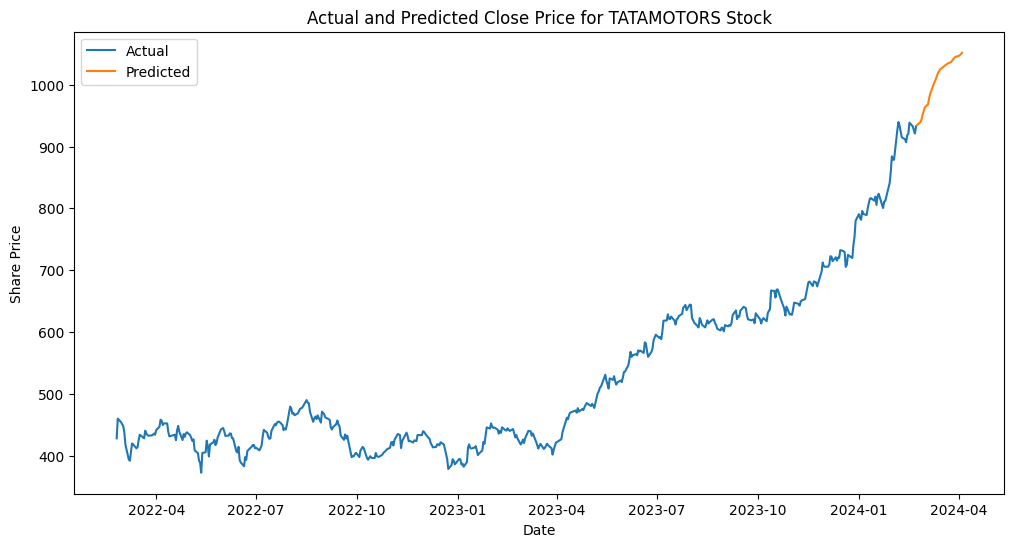

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["share_price"], label="Actual")
plt.plot(forecast.index, forecast["share_price"], label="Predicted")
plt.xlabel("Date")
plt.ylabel("Share Price")
plt.title("Actual and Predicted Close Price for TATAMOTORS Stock")
plt.legend()
plt.show()

As we can see we predict the next 30 days stock price of
tatamotors by the help of Autots forecasting. But there is no
guarantee that it will be 100% correct because the stock market
depends on the situation and if there is any war or political
instability or any disaster then the stock price will change.